<a href="https://colab.research.google.com/github/akashlal72/akashlal72/blob/main/the_better_india_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 13.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd #importing dataset and performing data analysis
import seaborn as sns #for data visulaisation
import matplotlib.pyplot as plt #for data visulisation
import string #for puntuation mark cleaning
import re
import nltk
import contractions
from nltk.tokenize import word_tokenize   #tokenizing text
from nltk.corpus import stopwords   #library to get stop word
import spacy


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Importing Dataset

In [ ]:
df=pd.read_csv("https://drive.google.com/u/0/uc?id=1ILpGRmj37QEoHkIGJwW043lrkkIOUg23&export=Downloads/") #importing data
df

,Article category,News Headline,Author,news_link,short_description,date
0,WEDDINGS,Real Weddings: Couples Who Got Married This We...,NaN,_RARE_,If there's ever a time you need a little distr...,29/07/13
1,WELLNESS,The Moment I Knew,"MeiMei Fox, Contributor\nNYTimes bestselling a...",_RARE_,NaN,02/05/13
2,POLITICS,Sunday Roundup,"Arianna Huffington, Contributor",_RARE_,NaN,17/01/15
3,PARENTS,Funniest Parenting Tweets: What Moms And Dads ...,Hollis Miller,_RARE_,"Kids may say the darndest things, but parents ...",15/07/16
4,BUSINESS,WATCH: 60 Seconds of Social Media,"Shawn Amos, Contributor\nblues preacher | cont...",_RARE_,"So, you think you're a real fashionista, hmm? ...",18/08/12
...,...,...,...,...,...,...
9995,ENTERTAINMENT,Real Weddings: Couples Who Got Married This We...,NaN,_RARE_,NaN,04/04/15
9996,FOOD & DRINK,Parenthesis: The Best Of The Mom And Dad Blogs...,Emma Mustich,_RARE_,To receive the eBay Roundup of Vintage Home Fi...,01/05/12
9997,THE WORLDPOST,Sunday Roundup,"Arianna Huffington, Contributor",_RARE_,NaN,23/11/14
9998,TECH,Watch The Top 9 YouTube Videos Of The Week,NaN,_RARE_,If you're looking to see the most popular YouT...,19/11/12


# Text Cleaning:
## Droping duplicate value.
## Droping rows with 3 blank cell in the column.
## Filling blank columns with NaN text.
## Removing HTML tags in the text
## Lowering the text.
## Removing URL with regex function.
## Removing Digit
## Removing Emoji's.
## Removing Puntualtion marks.
## Removing stop words
## Tokenizing the text.
## Lemmetize text data.(Using Spacy Library because nltk was not able to bring text in normal form)

*Note: These text cleaning steps are efficient with this text data

In [ ]:
df.drop_duplicates(inplace=True) #Droping duplicate value with same dates

In [ ]:
df=df.dropna(thresh=3) #droping row which have three blank columns
df.drop("news_link",axis=1,inplace=True)#dropping column which is not adding value

In [ ]:
df.fillna("NA",inplace=True)  #fiilling blank value with "NA"

In [ ]:
from bs4 import BeautifulSoup #This library is used here to remove all html tags in the text
def remove_html(text):
    """This function takes text as an input and remove html tags"""
    soup=BeautifulSoup(text,"html.parser")
    text1=soup.get_text()
    return text1

In [ ]:
 #removing HTMLtags from all the column
df["Author"]=df["Author"].apply(remove_html)   
df["Article category"]=df["Article category"].apply(remove_html)
df["News Headline"]=df["News Headline"].apply(remove_html)
df["short_description"]=df["short_description"].apply(remove_html)

In [ ]:
def author_name(text):
    """This function takes text as an input and takes out text before the comma from a statement """
    result_text=""
    for i in range(len(text)):
        if(text[i]==","):
            result_text=text[0:i]
            break
        else:
            result_text=result_text+text[i]
    return result_text

In [ ]:
df["Author"]=df["Author"].apply(lambda text: author_name(text)) 

In [ ]:
for i in df.columns:
    df[i]=df[i].str.lower()  #lower case the text
df

,Article category,News Headline,Author,short_description,date
0,weddings,real weddings: couples who got married this we...,na,if there's ever a time you need a little distr...,29/07/13
1,wellness,the moment i knew,meimei fox,na,02/05/13
2,politics,sunday roundup,arianna huffington,na,17/01/15
3,parents,funniest parenting tweets: what moms and dads ...,hollis miller,"kids may say the darndest things, but parents ...",15/07/16
4,business,watch: 60 seconds of social media,shawn amos,"so, you think you're a real fashionista, hmm? ...",18/08/12
...,...,...,...,...,...
9991,the worldpost,sunday roundup,arianna huffington,na,02/10/14
9994,money,best parenting tweets: what moms and dads said...,na,"kids may say the darndest things, but parents ...",27/01/14
9995,entertainment,real weddings: couples who got married this we...,na,na,04/04/15
9996,food & drink,parenthesis: the best of the mom and dad blogs...,emma mustich,to receive the ebay roundup of vintage home fi...,01/05/12


In [ ]:
def remove_url(text):                        #REM0VE URL LINK
    
    url_pattern = re.compile(r'(https?://|www\.|\S+.com|com|\S+@\S+)[^\s]+')
    for i,j in enumerate(text):
        text[i]=url_pattern.sub("",j)
        return text    

In [ ]:
df["Author"]=df["Author"].apply(lambda x: remove_url([x]))
df["News Headline"]=df["News Headline"].apply(lambda x: remove_url([x]))
df["short_description"]=df["short_description"].apply(lambda x: remove_url([x]))


In [ ]:
# df.to_excel("C:/Users/Admin/Desktop/testfile.xlsx",) #for seeing the data in excel 

In [ ]:
def remove_digit(text):     #removing digit from text
    ans =''.join([i for i in text if not i.isdigit()])
    return ans

In [ ]:
df["News Headline"]=df["News Headline"].apply(lambda text: remove_digit(text))   #removing digit on all column
df["Author"]=df["Author"].apply(lambda text: remove_digit(text))
df["short_description"]=df["short_description"].apply(lambda text: remove_digit(text))

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  
                           "]+", flags=re.UNICODE)
    return (emoji_pattern.sub(r'', text)) # no emoji

In [ ]:
df["News Headline"]=df["News Headline"].apply(lambda text: remove_emoji(text))   #removing emoticon on all column
df["Author"]=df["Author"].apply(lambda text: remove_emoji(text))
df["short_description"]=df["short_description"].apply(lambda text: remove_emoji(text))

In [ ]:
#  Remove stopword from the list
def remove_stopword(text):
    word= word_tokenize(text)
    stop_words=set(stopwords.words("english"))
    output_text=" ".join([i for i in word if i not in stop_words])
    return output_text
    
    

In [ ]:
df["News Headline"]=df["News Headline"].apply(lambda text: remove_stopword(text))   #removing digit on all column
df["Author"]=df["Author"].apply(lambda text: remove_stopword(text))
df["short_description"]=df["short_description"].apply(lambda text: remove_stopword(text))

In [ ]:
def remove_punctuations(text):     #removing puntuation
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
        text=text.replace("'"," ")
        
    return text

In [ ]:
df["News Headline"]=df["News Headline"].apply(lambda text: remove_punctuations(text))   #removing putuation from every comumn
df["Author"]=df["Author"].apply(lambda text: remove_punctuations(text))
df["short_description"]=df["short_description"].apply(lambda text: remove_punctuations(text))

In [ ]:
df["News Headline"]=df["News Headline"].str.strip()   #removing extra spaces from every comumn
df["Author"]=df["Author"].str.strip()
df["short_description"]=df["short_description"].str.strip()

In [ ]:
# nltk.download("wordnet")
# from nltk.stem import WordNetLemmatizer
# word_lemmatizer=WordNetLemmatizer()
# def word_lemmatize(text):
#     return " ".join([word_lemmatizer.lemmatize(word,pos="a") for word in text.split()])

In [ ]:
# df["News Headline"]=df["News Headline"].apply(lambda text: word_lemmatize(text))   #removing putuation from every comumn
# df["Author"]=df["Author"].apply(lambda text: word_lemmatize(text))
# df["short_description"]=df["short_description"].apply(lambda text: word_lemmatize(text))

In [ ]:
nlp = spacy.load("en_core_web_sm")                  #loading english library
def word_lemmatize(text):                           #defining funcion
    doc = nlp(text)                                 #loadind text in a variable 
    return " ".join([token.lemma_ for token in doc])  #combining tokenized text after lemmatizing

df["News Headline"]=df["News Headline"].apply(lambda text: word_lemmatize(text))   #Lemamtizing text from every comumn
df["Author"]=df["Author"].apply(lambda text: word_lemmatize(text))
df["short_description"]=df["short_description"].apply(lambda text: word_lemmatize(text))



In [ ]:
df

,Article category,News Headline,Author,short_description,date
0,weddings,real wedding couple get marry weekend,na,ever time need little distraction life divorce...,29/07/13
1,wellness,moment know,meimei fox,na,02/05/13
2,politics,sunday roundup,arianna huffington,na,17/01/15
3,parents,funniest parenting tweet mom dad say twitter week,hollis miller,kid may say darndest thing parent tweet funnie...,15/07/16
4,business,watch second social medium,shawn amos,think real fashionista hmm well step right tak...,18/08/12
...,...,...,...,...,...
9991,the worldpost,sunday roundup,arianna huffington,na,02/10/14
9994,money,good parenting tweet mom dad say twitter week,na,kid may say darndest thing parent tweet funnie...,27/01/14
9995,entertainment,real wedding couple get marry weekend photo,na,na,04/04/15
9996,food & drink,parenthesis good mom dad blog week,emma mustich,receive ebay roundup vintage home find via ema...,01/05/12


In [ ]:
df["Author"].unique().shape

(266,)

In [ ]:
df["Author"].unique()

array(['na', 'meimei fox', 'arianna huffington', 'hollis miller',
       'shawn amos', 'matt wilstein', 'robbie couch', 'mary kincaid',
       'emma mustich', 'kim bellware', 'kira brekke',
       'james michael nichols', 'christine friar', 'carol kuruvilla',
       'matthew lynch', 'alanna vagiano', 'willa frej', 'carly ledbetter',
       'juliet spy gin', 'karin badt', 'todd van luling',
       'katherine brooks', 'antonia blumberg', 'minou clark',
       'erica cheung', 'amanda pena', 'lee moran', 'lauren leibowitz',
       'michael mclaughlin', 'murali balaji', 'ryan grenoble',
       'cayla rasi', 'jenna amatulli', 'lydia connor', 'catharine smith',
       'mandy velez', 'reuter', 'amanda l chan', 'priscilla frank',
       'rahel gebreyes', 'landess kearn', 'dave jamieson',
       'conversation global', 'britney fitzgerald', 'rebecca klein',
       'william lamber', 'ryan buxton', 'dino grandoni',
       'jamesmichael nichols', 'amanda mcgowan', 'talia lavin',
       'michelle man

#Exploratory Data Analysis






In [ ]:
df

,Article category,News Headline,Author,short_description,date
0,weddings,real wedding couple get marry weekend,na,ever time need little distraction life divorce...,29/07/13
1,wellness,moment know,meimei fox,na,02/05/13
2,politics,sunday roundup,arianna huffington,na,17/01/15
3,parents,funniest parenting tweet mom dad say twitter week,hollis miller,kid may say darndest thing parent tweet funnie...,15/07/16
4,business,watch second social medium,shawn amos,think real fashionista hmm well step right tak...,18/08/12
...,...,...,...,...,...
9991,the worldpost,sunday roundup,arianna huffington,na,02/10/14
9994,money,good parenting tweet mom dad say twitter week,na,kid may say darndest thing parent tweet funnie...,27/01/14
9995,entertainment,real wedding couple get marry weekend photo,na,na,04/04/15
9996,food & drink,parenthesis good mom dad blog week,emma mustich,receive ebay roundup vintage home find via ema...,01/05/12


In [ ]:
article_category=df["Article category"].unique()
article_category


array(['weddings', 'wellness', 'politics', 'parents', 'business',
       'food & drink', 'travel', 'comedy', 'impact', 'home & living',
       'black voices', 'parenting', 'queer voices', 'environment',
       'weird news', 'worldpost', 'healthy living', 'sports',
       'entertainment', 'crime', 'college', 'media', 'the worldpost',
       'women', 'arts & culture', 'good news', 'style & beauty', 'style',
       'culture & arts', 'divorce', 'religion', 'money', 'science',
       'green', 'taste', 'world news', 'tech', 'arts', 'latino voices',
       'education', 'fifty'], dtype=object)

In [ ]:
df["Article category"].value_counts()

politics          739
entertainment     514
travel            438
style & beauty    365
queer voices      304
food & drink      286
healthy living    249
business          240
parenting         233
sports            232
wellness          225
comedy            216
black voices      194
women             185
home & living     185
weddings          174
crime             168
impact            166
parents           163
divorce           160
the worldpost     148
worldpost         132
media             129
weird news        120
style             112
religion          109
taste             101
world news         99
green              96
tech               92
science            90
good news          84
arts               71
money              71
college            67
arts & culture     67
fifty              64
culture & arts     60
environment        59
latino voices      57
education          37
Name: Article category, dtype: int64

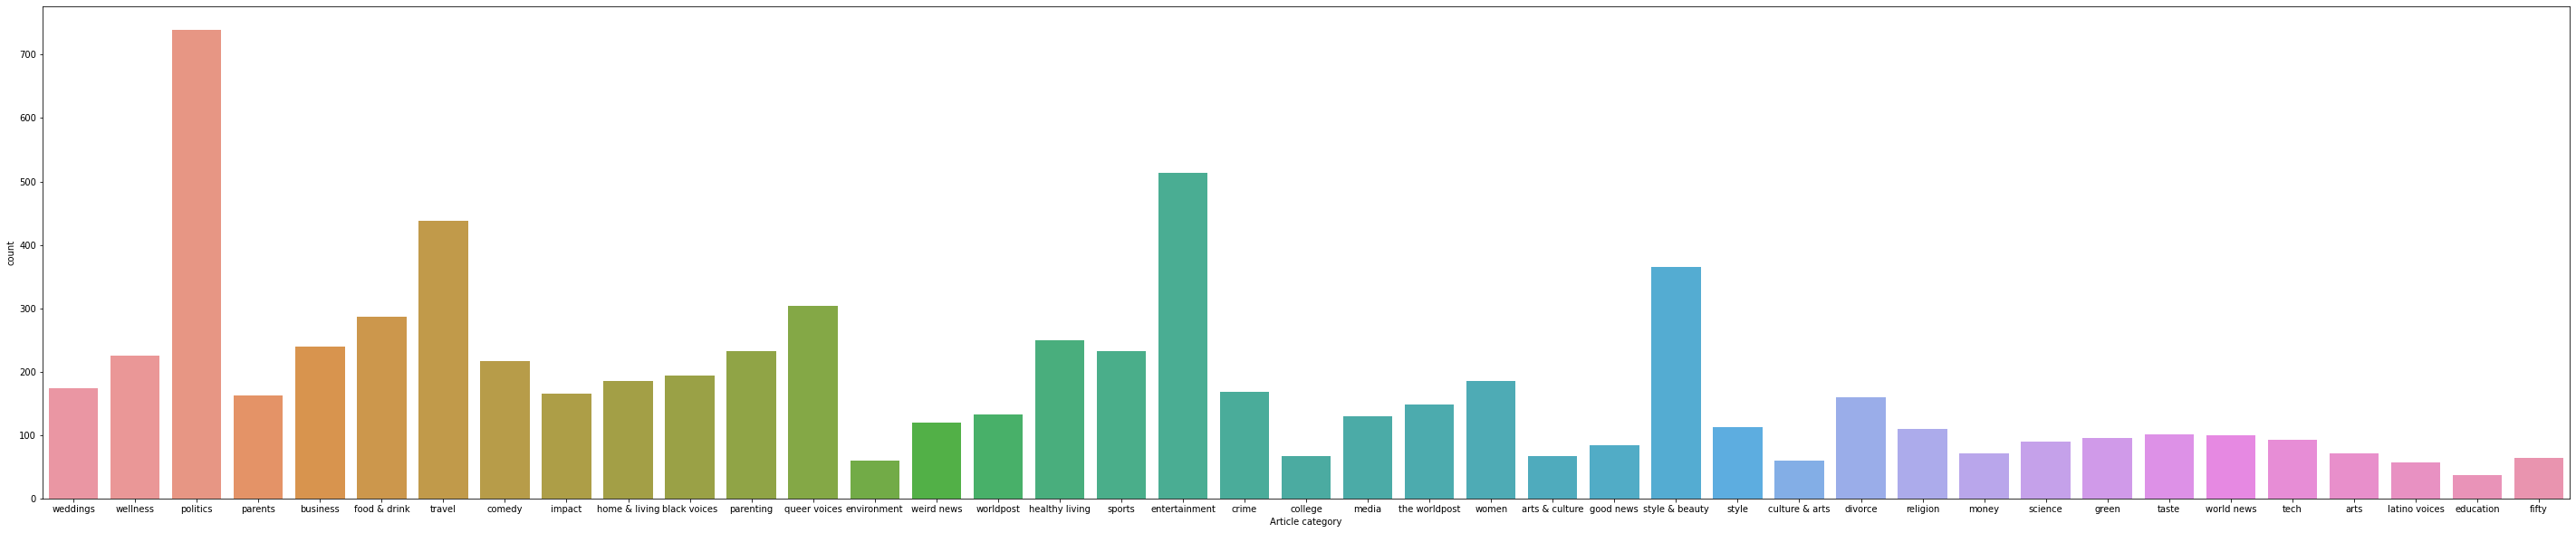

In [ ]:
plt.figure(figsize=(50,10))
sns.countplot(x="Article category",data=df);

In [ ]:
author_dataframe=pd.DataFrame(df["Author"].value_counts())
author_dataframe.index.name="Author name"
author_dataframe


,Author
Author name,
na,2169
arianna huffington,1167
mary kincaid,643
todd van luling,427
hollis miller,285
...,...
mandy velez,1
zac thompson,1
joanna zelman,1


In [ ]:
author_dataframe.rename(columns={"Author":"Author count"},inplace=True)
author_dataframe.loc[(author_dataframe["Author count"]<2000) & (author_dataframe["Author count"]>20)]

,Author count
Author name,
arianna huffington,1167
mary kincaid,643
todd van luling,427
hollis miller,285
alanna vagiano,230
carol kuruvilla,227
meimei fox,221
emma mustich,216
matt wilstein,210


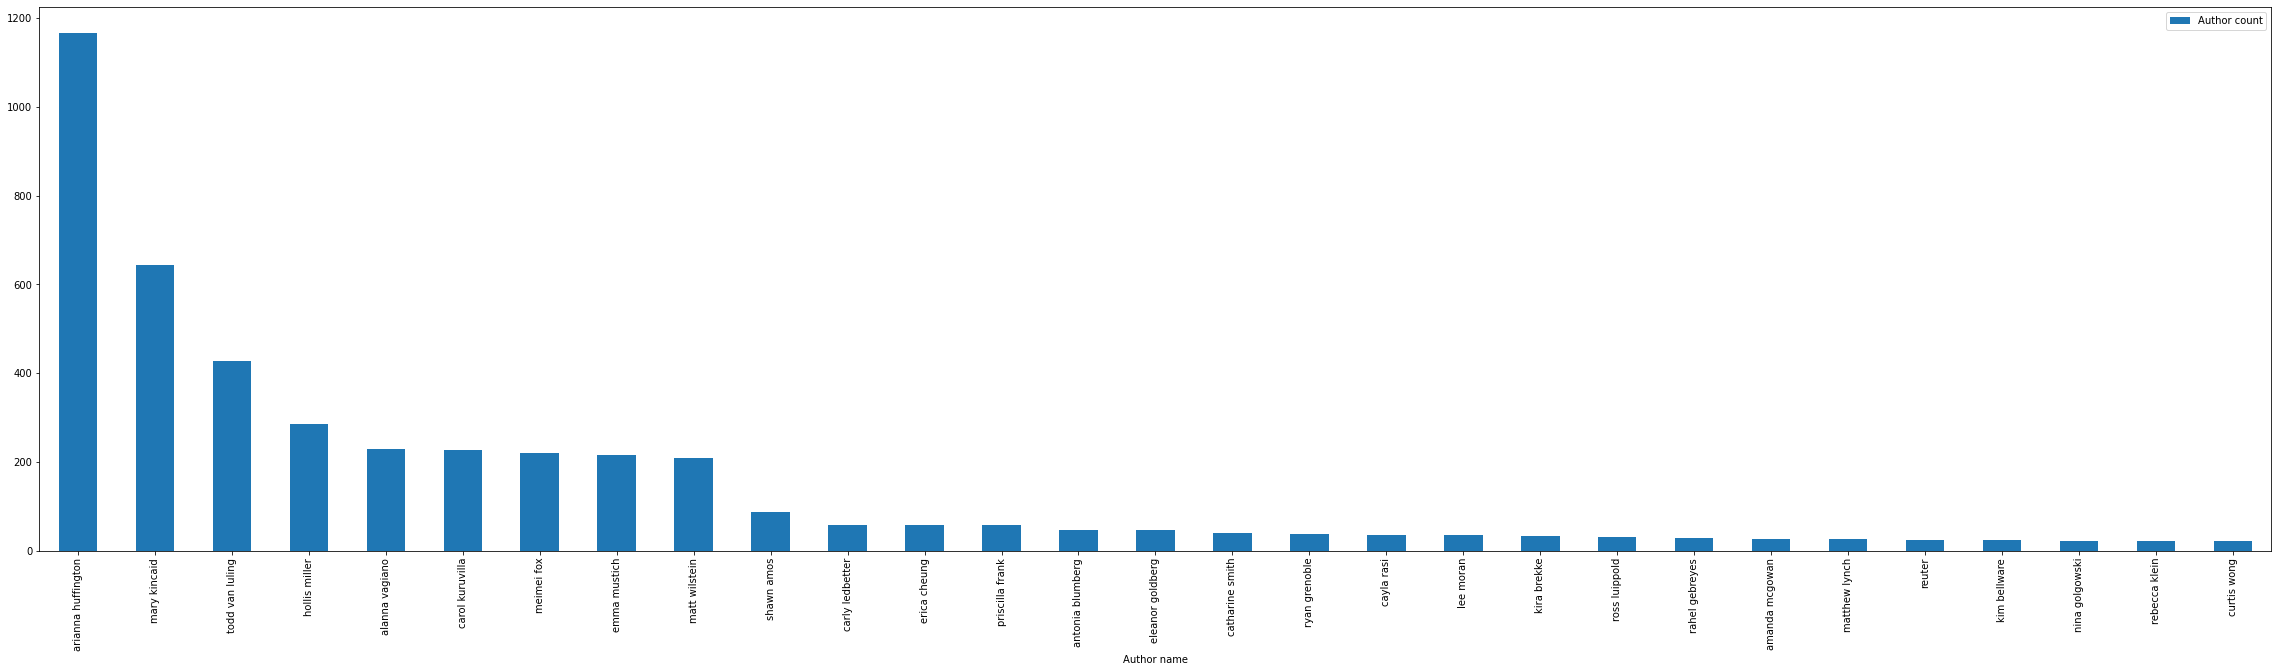

In [ ]:
author_dataframe1=author_dataframe.loc[(author_dataframe["Author count"]<2000) & (author_dataframe["Author count"]>20)]  #filtering out the author whose contribution is <2000 and >20
author_dataframe1.plot(kind="bar",figsize=(40,10))  #ploting the bar graph for the above filtered dataset


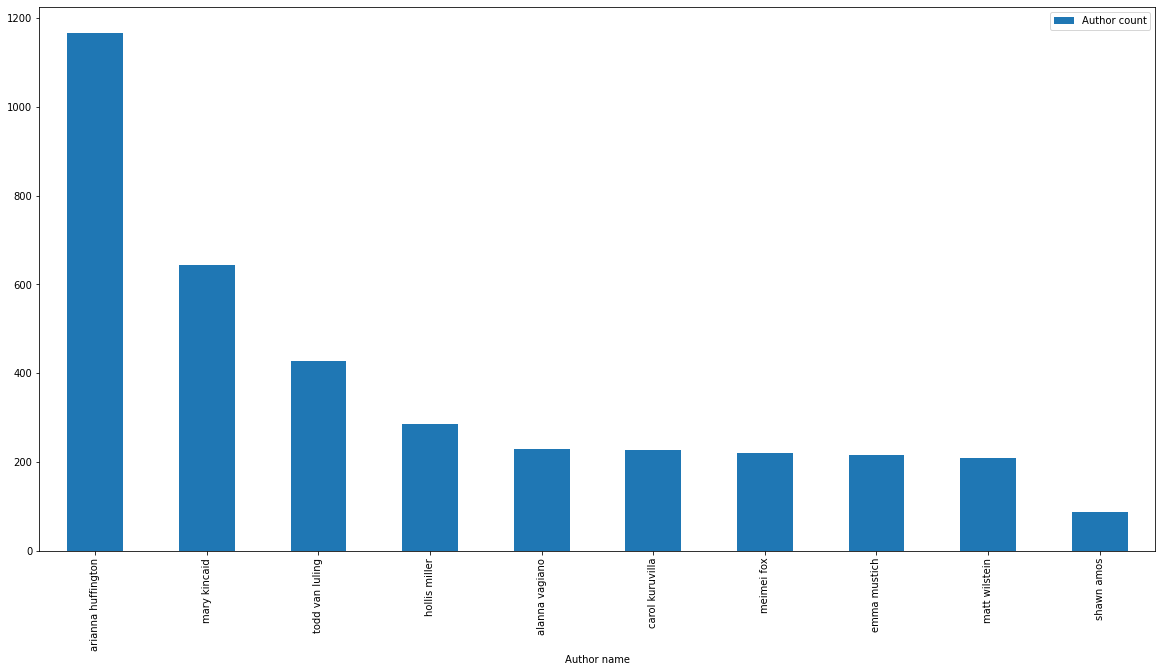

In [ ]:
author_dataframe2=author_dataframe.loc[(author_dataframe["Author count"]<2000) & (author_dataframe["Author count"]>80)] #filtering our the top 10 contibutor in the comapny
author_dataframe2.plot(kind="bar",figsize=(20,10))

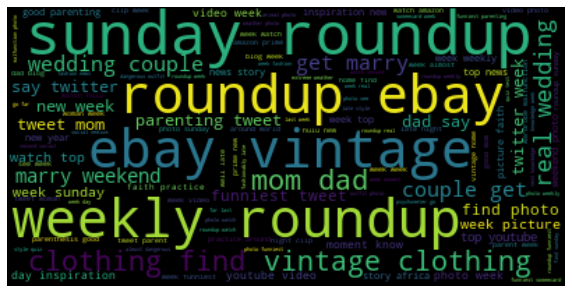

In [ ]:
from wordcloud import WordCloud                   #importing wordcloud
text=" ".join(df["News Headline"].values)         #taking out all the text from the column 
stopword=["na"]                                   #removing specific word from wordcloud
wordclouds= WordCloud(stopwords=stopword).generate(text)    #making wordcloud function
plt.figure(figsize=(10,10))                       #fixing imagesize
plt.imshow(wordclouds,interpolation="bilinear")
plt.axis("off")
plt.show()

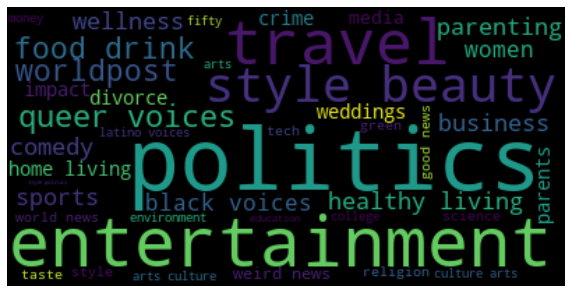

In [ ]:
text=" ".join(df["Article category"].values)
wordclouds= WordCloud().generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordclouds,interpolation="bilinear")
plt.axis("off")
plt.show()

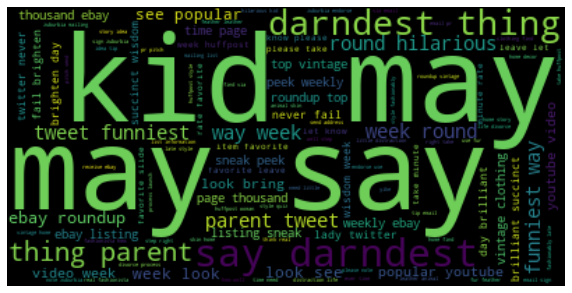

In [ ]:
text=" ".join(df["short_description"].values)
stopword=["na"]
wordclouds= WordCloud(stopwords=stopword).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordclouds,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df["Article category"].value_counts()

politics          739
entertainment     514
travel            438
style & beauty    365
queer voices      304
food & drink      286
healthy living    249
business          240
parenting         233
sports            232
wellness          225
comedy            216
black voices      194
women             185
home & living     185
weddings          174
crime             168
impact            166
parents           163
divorce           160
the worldpost     148
worldpost         132
media             129
weird news        120
style             112
religion          109
taste             101
world news         99
green              96
tech               92
science            90
good news          84
arts               71
money              71
college            67
arts & culture     67
fifty              64
culture & arts     60
environment        59
latino voices      57
education          37
Name: Article category, dtype: int64

In [ ]:
from collections import Counter                  # importing Counter function to count most number of word
corpus=[]                                        #intializing blank list
for i in df[df['Article category']=="politics"]["short_description"].str.split():
    for j in i:
        corpus.append(j)
counter=Counter(corpus)
most=counter.most_common()
most[1:20]      #top 20 most comon word 

[('home', 168),
 ('ebay', 140),
 ('zuburbia', 119),
 ('email', 113),
 ('roundup', 102),
 ('vintage', 102),
 ('find', 84),
 ('please', 73),
 ('receive', 64),
 ('via', 64),
 ('sign', 64),
 ('mailing', 64),
 ('list', 64),
 ('information', 64),
 ('note', 55),
 ('endorse', 55),
 ('use', 55),
 ('fur', 55),
 ('feather', 55)]

In [ ]:
corpus=[]                                        #intializing blank list
for i in df[df['Article category']=="entertainment"]["short_description"].str.split():
    for j in i:
        corpus.append(j)
counter=Counter(corpus)
most=counter.most_common()
most[1:20]      #top 20 most comon word 

[('week', 160),
 ('―', 146),
 ('huffpost', 79),
 ('lady', 77),
 ('twitter', 77),
 ('never', 77),
 ('fail', 77),
 ('brighten', 77),
 ('day', 77),
 ('brilliant', 77),
 ('succinct', 77),
 ('wisdom', 77),
 ('woman', 73),
 ('look', 60),
 ('kid', 53),
 ('may', 53),
 ('say', 53),
 ('darndest', 53),
 ('thing', 53)]

In [ ]:

corpus=[]                                        #intializing blank list
for i in df[df['Article category']=="travel"]["short_description"].str.split():   #finding common word in "Travel category"
    for j in i:
        corpus.append(j)
counter=Counter(corpus)
most=counter.most_common()
most[:20]      #top 20 most comon word 

[('ebay', 210),
 ('na', 192),
 ('roundup', 110),
 ('vintage', 110),
 ('page', 103),
 ('time', 100),
 ('thousand', 100),
 ('listing', 100),
 ('sneak', 100),
 ('peek', 100),
 ('weekly', 100),
 ('top', 100),
 ('clothing', 100),
 ('favorite', 64),
 ('please', 56),
 ('week', 51),
 ('home', 47),
 ('take', 43),
 ('find', 39),
 ('zuburbia', 34)]